In [ ]:
!pip install numpy pandas matplotlib seaborn plotly

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/shanghai_ranking_2024.csv')
df.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     989 non-null    float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [ ]:
df.isnull().sum()

,0
Rank,0
University_Name,0
National/Regional Rank,0
Alumni,0
Award,0
Hici,0
N&S,11
PUB,0
PCP,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Rank,0
University_Name,0
National/Regional Rank,0
Alumni,0
Award,0
Hici,0
N&S,0
PUB,0
PCP,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Alumni,Award,Hici,N&S,PUB,PCP
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,4.537513,3.765420,10.817189,10.575126,35.242973,19.682609
std,10.133848,11.478268,10.971540,10.637247,13.683436,8.815979
min,0.000000,0.000000,0.000000,0.000000,9.300000,8.600000
25%,0.000000,0.000000,0.000000,3.900000,25.800000,14.200000
50%,0.000000,0.000000,9.200000,7.300000,31.800000,17.600000
75%,0.000000,0.000000,14.600000,13.300000,41.500000,23.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
df.drop('Rank', axis=1, inplace=True)

In [ ]:
df.University_Name.nunique()


989

In [ ]:
df.groupby(['University_Name'])['National/Regional Rank'].value_counts()

,,count
University_Name,National/Regional Rank,
AGH University of Krakow,4-8,1
AUT University,5-7,1
Aalborg University,5,1
Aalto University,2-4,1
Aarhus University,2,1
...,...,...
Zhejiang Normal University,138-156,1
Zhejiang Sci-Tech University,92-114,1
Zhejiang University,3,1


<Axes: xlabel='Award', ylabel='Count'>

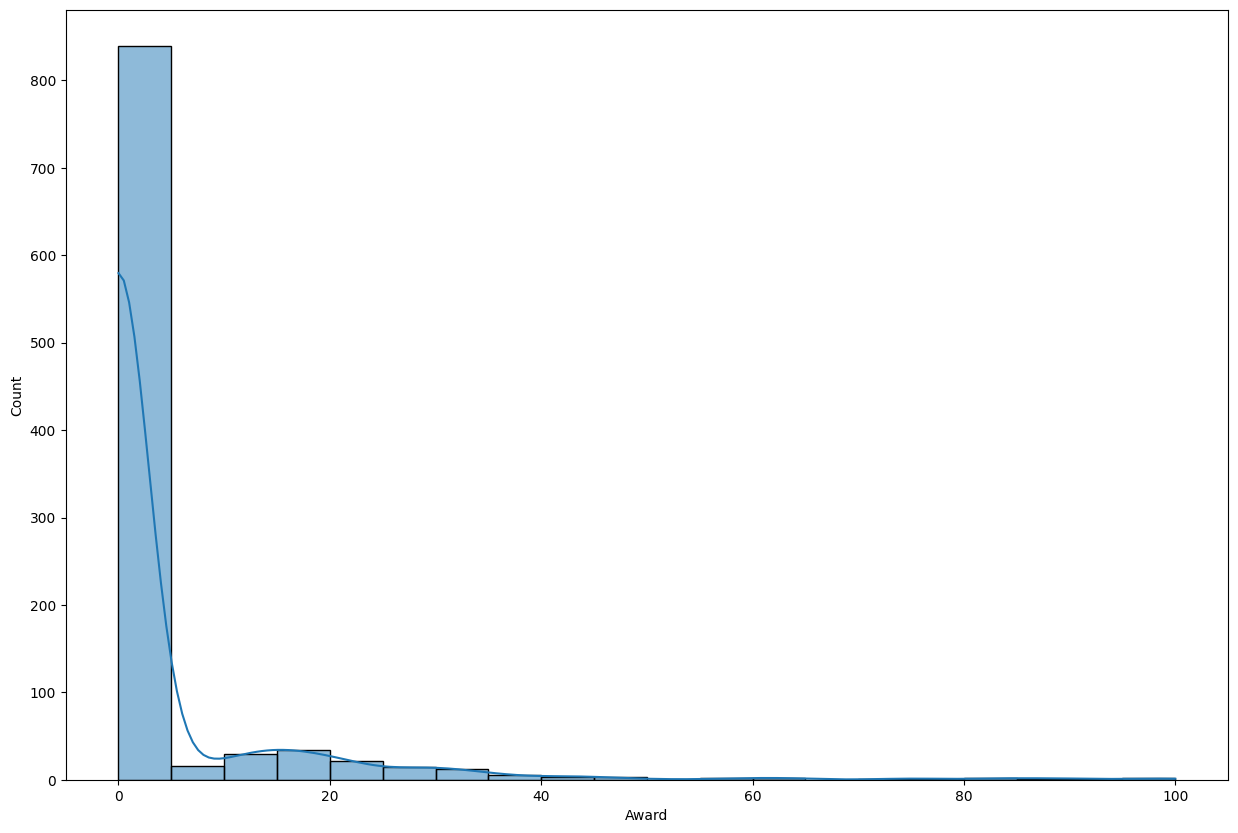

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df['Award'], kde=True, bins=20)

In [ ]:
df.groupby(by="University_Name").mean(numeric_only=True).style.background_gradient()

,Alumni,Award,Hici,N&S,PUB,PCP
University_Name,,,,,,
AGH University of Krakow,0.000000,0.000000,0.000000,2.000000,28.000000,11.600000
AUT University,0.000000,0.000000,6.500000,2.000000,21.200000,15.100000
Aalborg University,0.000000,0.000000,13.000000,5.000000,37.500000,17.000000
Aalto University,0.000000,0.000000,6.500000,12.400000,31.700000,14.700000
Aarhus University,10.400000,20.300000,15.900000,24.400000,55.700000,28.200000
Abdul Wali Khan University Mardan,0.000000,0.000000,6.500000,3.800000,20.900000,9.400000
Adam Mickiewicz University,0.000000,0.000000,0.000000,5.700000,25.100000,9.200000
Addis Ababa University,16.400000,0.000000,0.000000,6.100000,25.300000,12.100000
Ain Shams University,0.000000,0.000000,0.000000,5.100000,33.500000,14.400000


**About Dataset**

**1. General Overview**

This dataset provides detailed information about the methodology used in the 2024 Academic Ranking of World Universities (ARWU), commonly known as the ShanghaiRanking. The ARWU evaluates and ranks universities worldwide based on academic and research performance indicators. In 2024, more than 2,500 universities were considered, with the top 1,000 being published.

**2. Candidate Universities**

ARWU includes universities that meet at least one of the following criteria:

Presence of Nobel Laureates or Fields Medalists among alumni or staff.
Inclusion of Highly Cited Researchers™ (selected by Clarivate™).
Publications in high-impact journals such as Nature or Science.
A significant volume of papers indexed in the Science Citation Index-Expanded™ (SCIE) or Social Science Citation Index™ (SSCI).

**3. Ranking Criteria and Weights**
Universities are ranked based on six key indicators, weighted as follows:

Quality of Education (Alumni): 10%
Alumni winning Nobel Prizes or Fields Medals.
Quality of Faculty (Award): 20%
Staff winning Nobel Prizes or Fields Medals.
Highly Cited Researchers (HiCi): 20%
Research Output:
Papers published in Nature and Science (N&S): 20%
Papers indexed in SCIE and SSCI (PUB): 20%
Per Capita Performance (PCP): 10%
Per capita academic performance of the institution.

**4. Indicator Definitions**
Alumni: Number of alumni winning Nobel Prizes or Fields Medals, weighted based on the period in which degrees were obtained.
Award: Number of staff members winning Nobel Prizes or Fields Medals, weighted based on the period when the prizes were awarded.
HiCi: Number of Highly Cited Researchers selected by Clarivate™, considering only primary affiliations.
N&S: Number of research articles published in Nature and Science between 2019 and 2023, weighted based on author affiliation.
PUB: Number of papers indexed in SCIE and SSCI in 2023, with special weighting for SSCI-indexed papers.
PCP: Weighted scores of the above five indicators divided by the number of full-time equivalent academic staff.

**5. Data Sources**
Nobel Prize Laureates: nobelprize.org
Fields Medalists: mathunion.org
Highly Cited Researchers: clarivate.com
Nature and Science Papers: webofscience.com
SCIE and SSCI Papers: webofscience.com
Staff Data: Obtained from national or regional agencies, such as the National Ministry of Education, National Bureau of Statistics, or national associations of universities.